In [3]:
# Import the libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')      # Ignore seaborn warning messages

In [4]:
# Import the dataset 

realestate = pd.read_csv('regression_data_clean.csv')

In [5]:
realestate.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,10/13/14,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,12/9/14,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,5631500400,2/25/15,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2487200875,12/9/14,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,1954400510,2/18/15,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000


In [6]:
realestate.tail()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
21592,263000018,5/21/14,3,2.50,1530,1131,3.0,0,0,3,...,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,360000
21593,6600060120,2/23/15,4,2.50,2310,5813,2.0,0,0,3,...,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,400000
21594,1523300141,6/23/14,2,0.75,1020,1350,2.0,0,0,3,...,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,402101
21595,291310100,1/16/15,3,2.50,1600,2388,2.0,0,0,3,...,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,400000
21596,1523300157,10/15/14,2,0.75,1020,1076,2.0,0,0,3,...,1020,0,2008,0,98144,47.5941,-122.299,1020,1357,325000


In [7]:
realestate.shape            # Check number of columns and rows in the dataframe

(21597, 21)

In [8]:
realestate.columns          # Check the column names

Index(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'price'],
      dtype='object')

In [9]:
# Since columns are already in a standardised format no changes are made

In [10]:
realestate.dtypes               # Checking the data types

id                 int64
date              object
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
price              int64
dtype: object

In [11]:
# Change date column to datatype 'date'. 
# Leaving this column like this for now as it will be drop before defining the model.

realestate['date'] = pd.to_datetime(realestate['date'], errors = 'coerce')

In [12]:
# Since all other columns are in a numerical format I leave them like this for now. 

In [13]:
realestate.dtypes            # Checking the updated datatype for date

id                        int64
date             datetime64[ns]
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
price                     int64
dtype: object

In [14]:
realestate.info()     # Further explore the different columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   bedrooms       21597 non-null  int64         
 3   bathrooms      21597 non-null  float64       
 4   sqft_living    21597 non-null  int64         
 5   sqft_lot       21597 non-null  int64         
 6   floors         21597 non-null  float64       
 7   waterfront     21597 non-null  int64         
 8   view           21597 non-null  int64         
 9   condition      21597 non-null  int64         
 10  grade          21597 non-null  int64         
 11  sqft_above     21597 non-null  int64         
 12  sqft_basement  21597 non-null  int64         
 13  yr_built       21597 non-null  int64         
 14  yr_renovated   21597 non-null  int64         
 15  zipcode        2159

In [15]:
realestate.isnull().any()         # Checking for null values

id               False
date             False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
price            False
dtype: bool

In [16]:
realestate.isnull().sum()*100/realestate.shape[0]        # Confirming zero null values

id               0.0
date             0.0
bedrooms         0.0
bathrooms        0.0
sqft_living      0.0
sqft_lot         0.0
floors           0.0
waterfront       0.0
view             0.0
condition        0.0
grade            0.0
sqft_above       0.0
sqft_basement    0.0
yr_built         0.0
yr_renovated     0.0
zipcode          0.0
lat              0.0
long             0.0
sqft_living15    0.0
sqft_lot15       0.0
price            0.0
dtype: float64

In [17]:
realestate.nunique()        # Checking the unique values of each column

id               21420
date               372
bedrooms            12
bathrooms           29
sqft_living       1034
sqft_lot          9776
floors               6
waterfront           2
view                 5
condition            5
grade               11
sqft_above         942
sqft_basement      306
yr_built           116
yr_renovated        70
zipcode             70
lat               5033
long               751
sqft_living15      777
sqft_lot15        8682
price             3622
dtype: int64

In [18]:
realestate['id'].value_counts()       # Note that there are some duplicate values in the ID column

795000620     3
1825069031    2
2019200220    2
7129304540    2
1781500435    2
             ..
7812801125    1
4364700875    1
3021059276    1
880000205     1
1777500160    1
Name: id, Length: 21420, dtype: int64

In [19]:
# Check duplicate values

duplicate_id = realestate[realestate.duplicated(subset=['id'], keep=False)]

duplicate_id.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
93,6021501535,2014-07-25,3,1.50,1580,5000,1.0,0,0,3,...,1290,290,1939,0,98117,47.6870,-122.386,1570,4500,430000
94,6021501535,2014-12-23,3,1.50,1580,5000,1.0,0,0,3,...,1290,290,1939,0,98117,47.6870,-122.386,1570,4500,700000
313,4139480200,2014-06-18,4,3.25,4290,12103,1.0,0,3,3,...,2690,1600,1997,0,98006,47.5503,-122.102,3860,11244,1380000
314,4139480200,2014-12-09,4,3.25,4290,12103,1.0,0,3,3,...,2690,1600,1997,0,98006,47.5503,-122.102,3860,11244,1400000
324,7520000520,2014-09-05,2,1.00,1240,12092,1.0,0,0,3,...,960,280,1922,1984,98146,47.4957,-122.352,1820,7460,232000


In [20]:
# Since the duplicate ID's seem to be for the same property but at a different date and at a different price
# I decide to keep them. This could indicate that the property was sold more than once
# and could be important for our analysis.

In [21]:
realestate.describe()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,2.159700e+04
mean,4.580474e+09,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007547,0.234292,3.409825,7.657915,1788.596842,291.725008,1970.999676,84.464787,98077.951845,47.560093,-122.213982,1986.620318,12758.283512,5.402966e+05
std,2.876736e+09,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086549,0.766390,0.650546,1.173200,827.759761,442.667800,29.375234,401.821438,53.513072,0.138552,0.140724,685.230472,27274.441950,3.673681e+05
min,1.000102e+06,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,7.800000e+04
25%,2.123049e+09,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000,3.220000e+05
50%,3.904930e+09,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000,4.500000e+05
75%,7.308900e+09,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,6.450000e+05
max,9.900000e+09,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,7.700000e+06


In [22]:
# One of the houses have 33 rooms and must be very large. I want to analyse this further. 

realestate[(realestate.bedrooms == 33)]

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
15856,2402100895,2014-06-25,33,1.75,1620,6000,1.0,0,0,5,...,1040,580,1947,0,98103,47.6878,-122.331,1330,4700,640000


In [23]:
# 33 rooms but only 1.75 toilets and 4700 squarefeet. This could be a typo. 
# I would regard this as bad data. 
# However since we do not have any evidence I am going to keep it for now.

In [24]:
# Looking into the details of the most expensive house 

realestate[(realestate.price == 7700000)]

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
7245,6762700020,2014-10-13,6,8.0,12050,27600,2.5,0,3,4,...,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800,7700000


In [25]:
# All columns are already in a numeric format, however, since some variables are discrete
# and others are continuous in nature I will create two dataframes and explore the correlation
# of each independent variable with the dependent variable 'price' using different visualisations

In [26]:
# Visualising using scatter plot

In [27]:
realestate_con = realestate.drop(['id', 'date', 'waterfront', 'view', 'condition', 'grade', 'yr_built', 'yr_renovated', 'lat', 'long', 'zipcode', 'floors'], axis = 1)

In [28]:
realestate_con.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'sqft_above',
       'sqft_basement', 'sqft_living15', 'sqft_lot15', 'price'],
      dtype='object')

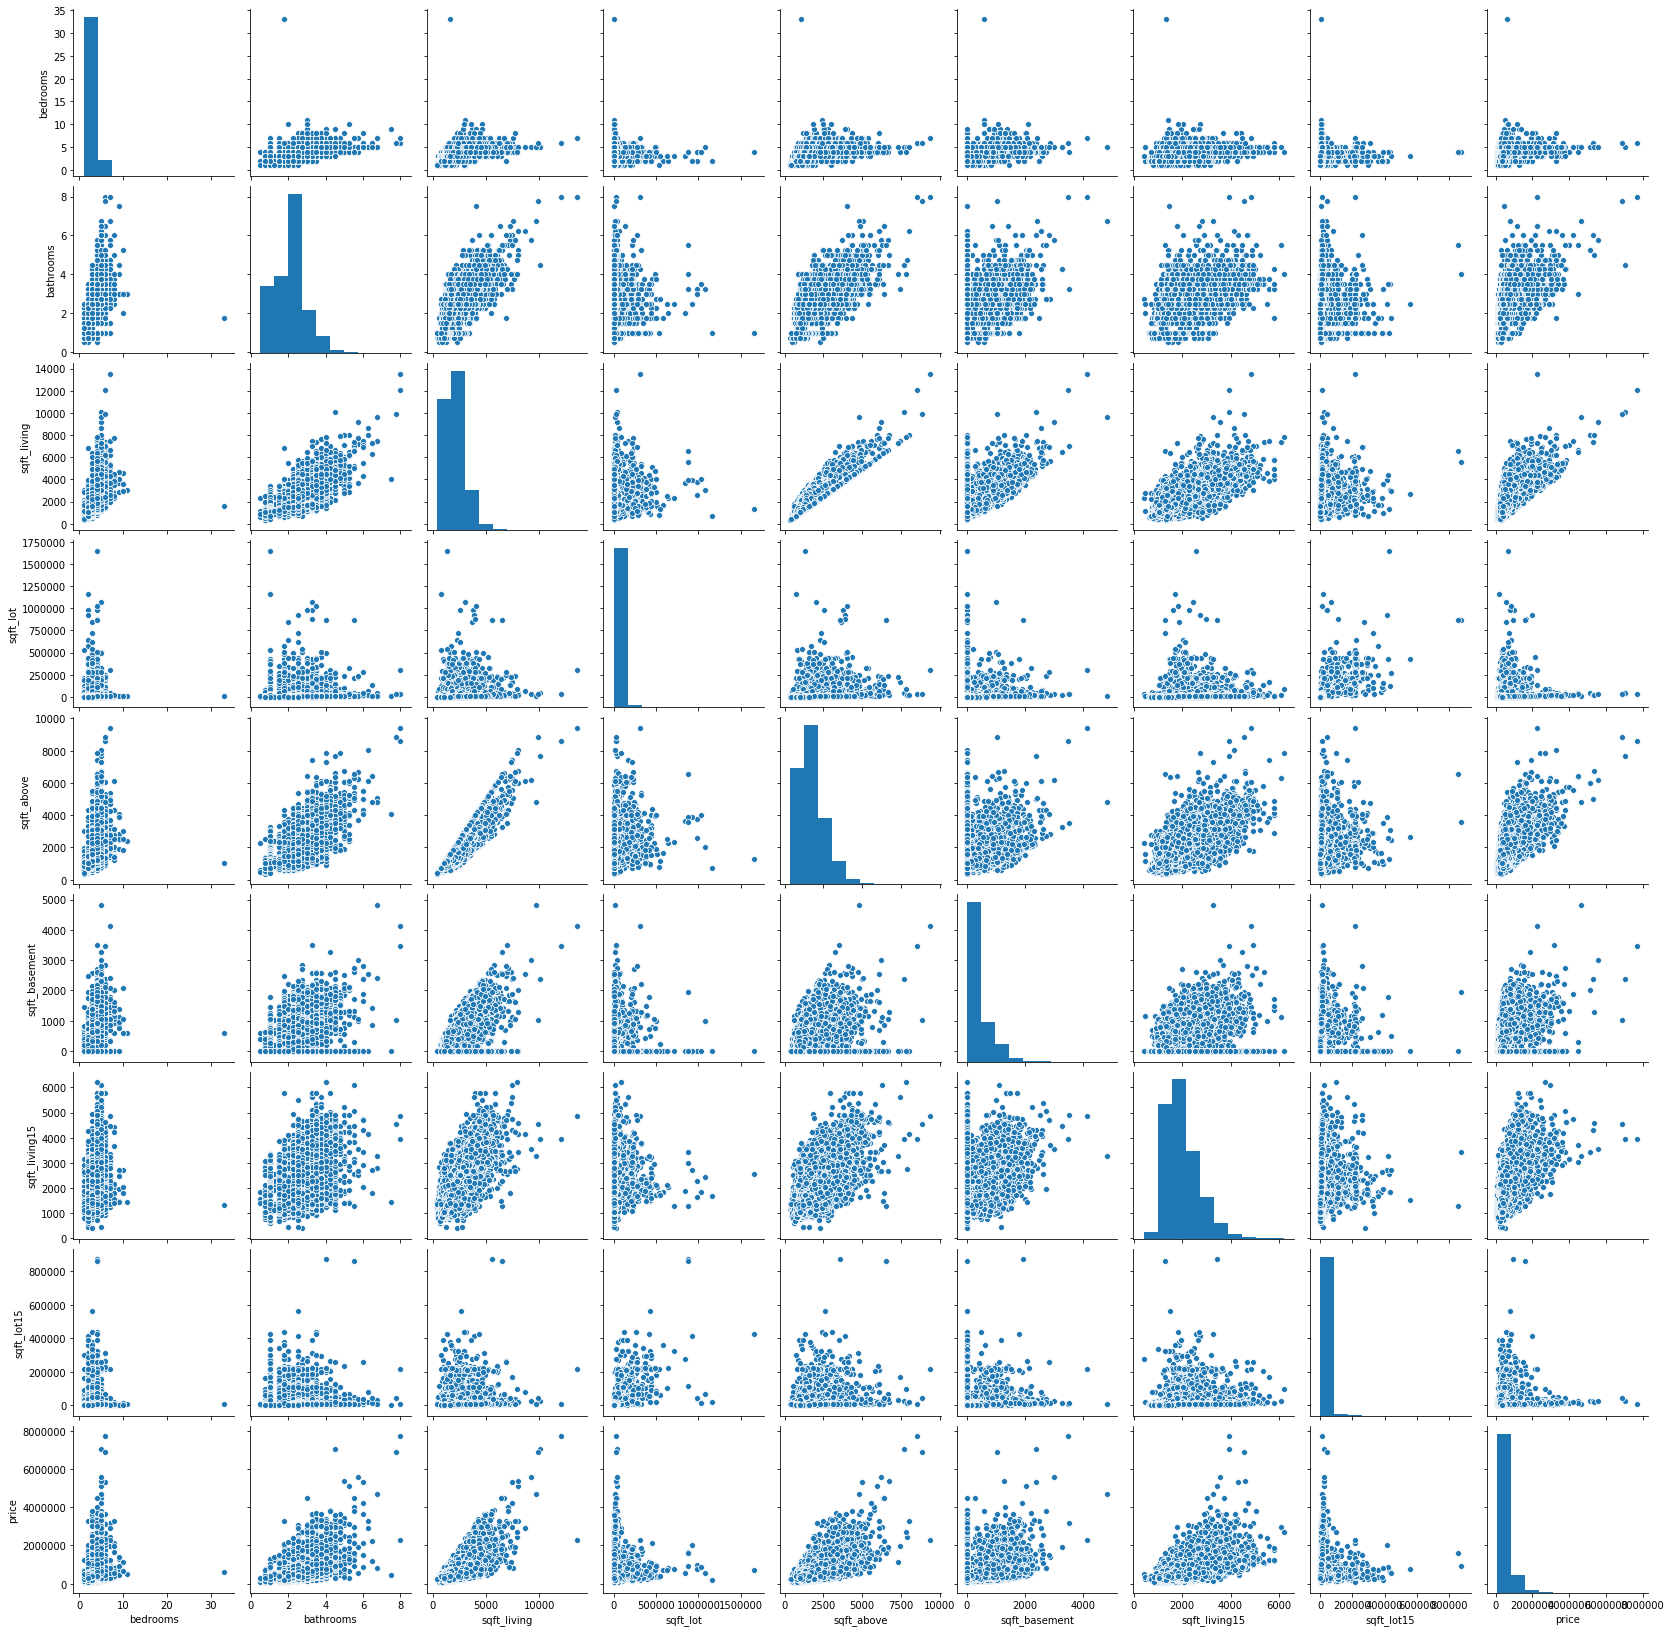

In [29]:
# Checking how the numerical variables correlate to the target variable 'price'

sns.pairplot(realestate_con)
plt.show()

In [30]:
# From the scatter plots we see that there seem to be a positive correlation in selling price and
# bathrooms, sqft_living, sqft_above, sqft_basement and sqft_living15
# No appearent corraltion between price and bedrooms

In [31]:
# Visualising using boxplot

In [32]:
# Creating a dataframe for variables of 'categorical nature'

realestate_dis = realestate.drop(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'sqft_above', 'sqft_basement', 'zipcode', 'sqft_living15', 'sqft_lot15', 'long', 'lat'], axis = 1)


In [33]:
# Print the columns to see which variables to box plot

realestate_dis.columns

Index(['waterfront', 'view', 'condition', 'grade', 'yr_built', 'yr_renovated',
       'price'],
      dtype='object')

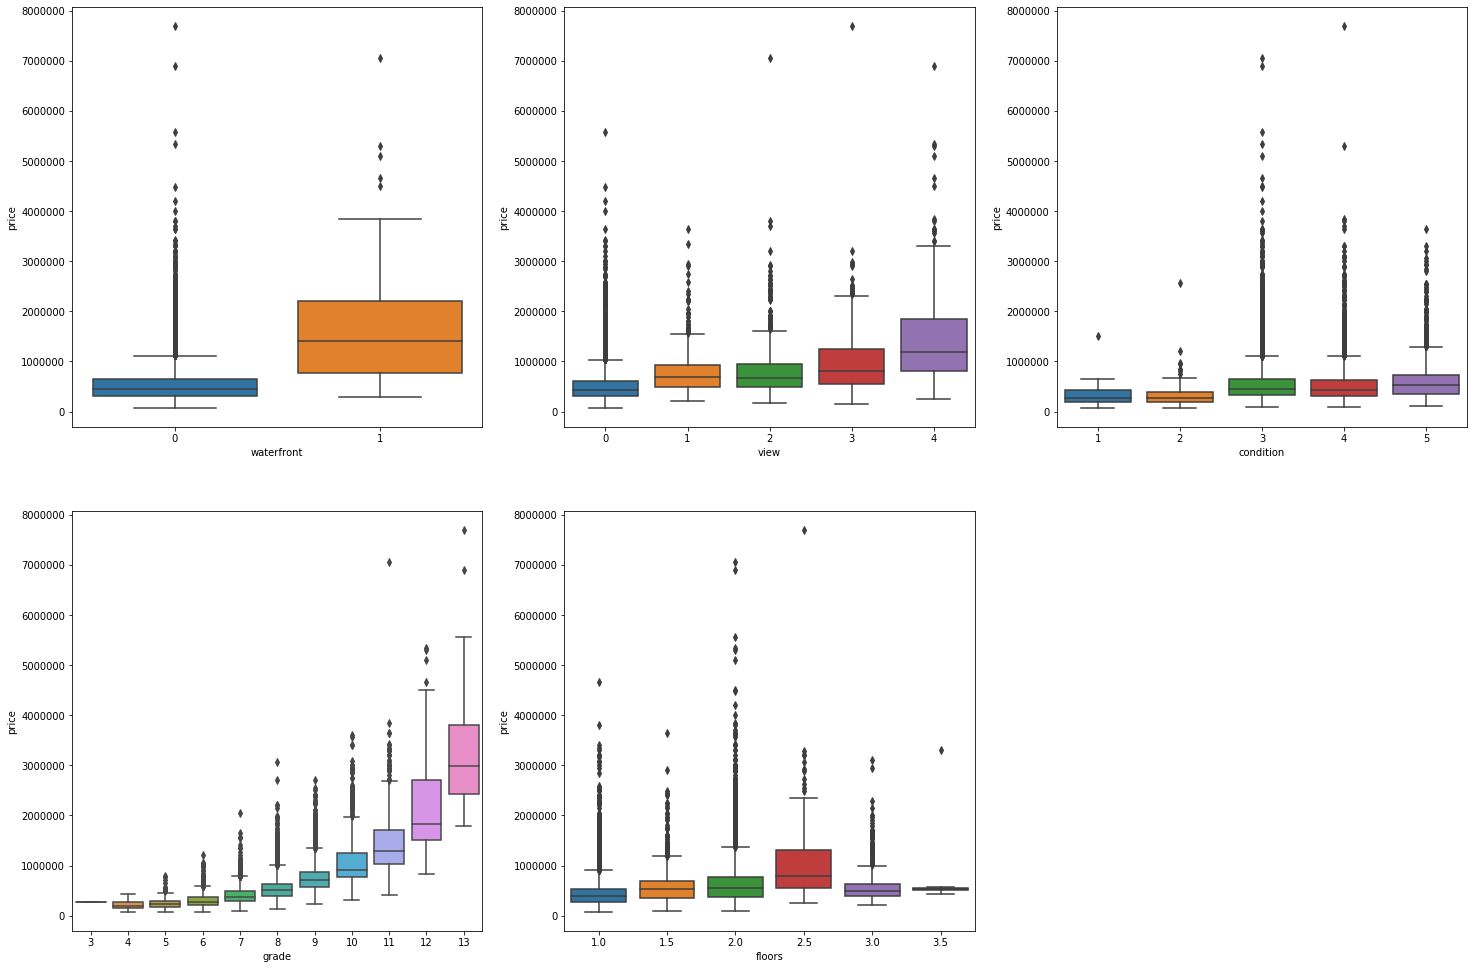

In [34]:
# Using box plots checking the correlation between selling price and variables that are categorical in nature

plt.figure(figsize=(25, 17))
plt.subplot(2,3,1)
sns.boxplot(x = 'waterfront', y = 'price', data = realestate)
plt.subplot(2,3,2)
sns.boxplot(x = 'view', y = 'price', data = realestate)
plt.subplot(2,3,3)
sns.boxplot(x = 'condition', y = 'price', data = realestate)
plt.subplot(2,3,4)
sns.boxplot(x = 'grade', y = 'price', data = realestate)
plt.subplot(2,3,5)
sns.boxplot(x = 'floors', y = 'price', data = realestate)
plt.show()

In [35]:
# We notice that the overall grade seem to play a big role in deciding the price of a house
# View and waterfront also seem to be positively correlated
# No appearent correlation for floors and condition

In [36]:
# It can be debated whether bathrooms, bedrooms and floors should be considered continuous or discrete
# Generally discrete values are whole numbers only, but due to the distribution of 'floors'
# I included this variable in the box plot visualisations

In [37]:
# Checking for correlation using a correlation matrix

corr_matrix = realestate.corr()
corr_matrix

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
id,1.000000,0.001150,0.005162,-0.012241,-0.131911,0.018608,-0.002727,0.011536,-0.023803,0.008188,-0.010799,-0.005193,0.021617,-0.016925,-0.008211,-0.001798,0.020672,-0.002701,-0.138557,-0.016772
bedrooms,0.001150,1.000000,0.514508,0.578212,0.032471,0.177944,-0.006834,0.080008,0.026496,0.356563,0.479386,0.302808,0.155670,0.018389,-0.154092,-0.009951,0.132054,0.393406,0.030690,0.308787
bathrooms,0.005162,0.514508,1.000000,0.755758,0.088373,0.502582,0.063744,0.188386,-0.126479,0.665838,0.686668,0.283440,0.507173,0.050544,-0.204786,0.024280,0.224903,0.569884,0.088303,0.525906
sqft_living,-0.012241,0.578212,0.755758,1.000000,0.173453,0.353953,0.103854,0.284709,-0.059445,0.762779,0.876448,0.435130,0.318152,0.055308,-0.199802,0.052155,0.241214,0.756402,0.184342,0.701917
sqft_lot,-0.131911,0.032471,0.088373,0.173453,1.000000,-0.004814,0.021632,0.074900,-0.008830,0.114731,0.184139,0.015418,0.052946,0.007686,-0.129586,-0.085514,0.230227,0.144763,0.718204,0.089876
floors,0.018608,0.177944,0.502582,0.353953,-0.004814,1.000000,0.023755,0.028814,-0.264075,0.458794,0.523989,-0.245715,0.489193,0.006427,-0.059541,0.049239,0.125943,0.280102,-0.010722,0.256804
waterfront,-0.002727,-0.006834,0.063744,0.103854,0.021632,0.023755,1.000000,0.401971,0.016611,0.082888,0.072109,0.080559,-0.026153,0.092873,0.030272,-0.014306,-0.041904,0.086507,0.030781,0.266398
view,0.011536,0.080008,0.188386,0.284709,0.074900,0.028814,0.401971,1.000000,0.045999,0.251728,0.167609,0.277078,-0.053636,0.103951,0.084622,0.005871,-0.078107,0.280681,0.072904,0.397370
condition,-0.023803,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.016611,0.045999,1.000000,-0.146896,-0.158904,0.173849,-0.361592,-0.060788,0.002888,-0.015102,-0.105877,-0.093072,-0.003126,0.036056
grade,0.008188,0.356563,0.665838,0.762779,0.114731,0.458794,0.082888,0.251728,-0.146896,1.000000,0.756073,0.168220,0.447865,0.014261,-0.185771,0.113575,0.200341,0.713867,0.120981,0.667951


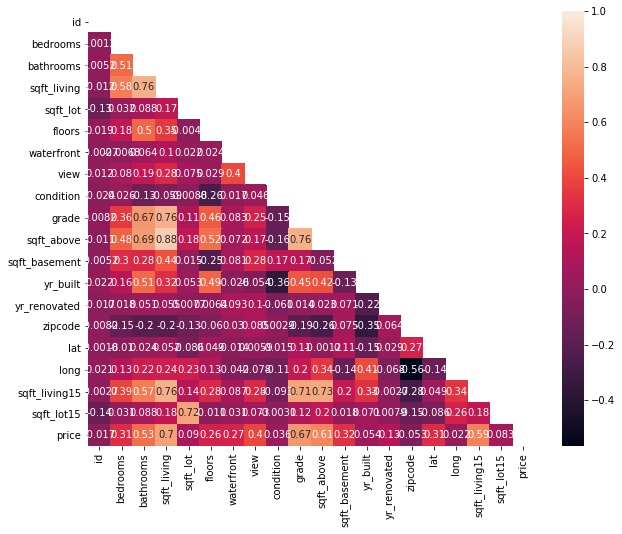

In [38]:
# Checking for correlations and multicorrilineraity using a heatmap

mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, mask=mask, annot=True)
plt.show()

In [39]:
# Since I suspect there might be high multicorrilineraity between some of the variables 
# I also check for multicorrilinearity using VIF

X = realestate.drop(['price', 'id', 'date'], axis=1)         # I drop column 'id' and 'date' since they do not add any value to the analysis

In [40]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [41]:
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['variable'] = X.columns

In [42]:
vif

,VIF,variable
0,2.349591e+01,bedrooms
1,2.885373e+01,bathrooms
2,inf,sqft_living
3,2.374954e+00,sqft_lot
4,1.692958e+01,floors
5,1.213088e+00,waterfront
6,1.552470e+00,view
7,3.473689e+01,condition
8,1.484346e+02,grade
9,inf,sqft_above


In [43]:
# I drop yr_built and sqft_living to attempt reduce multicorrilineraity 

X = realestate.drop(['price', 'id', 'date', 'yr_built', 'sqft_living'], axis=1) 

In [44]:
vif1 = pd.DataFrame()
vif1['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif1['variable'] = X.columns

In [45]:
vif1      # A much better VIF score this time

,VIF,variable
0,2.344334e+01,bedrooms
1,2.538323e+01,bathrooms
2,2.372807e+00,sqft_lot
3,1.645432e+01,floors
4,1.212748e+00,waterfront
5,1.527167e+00,view
6,3.182407e+01,condition
7,1.420738e+02,grade
8,2.736284e+01,sqft_above
9,2.798941e+00,sqft_basement


In [46]:
# In the following section I played around with reducing and changing the variables in the dataframe
# to try to find four variables which had a high correlation to the selling price
# but at the same time control the VIF score

realestate_reduced = realestate.drop(['id', 'date', 'yr_built'], axis=1) 

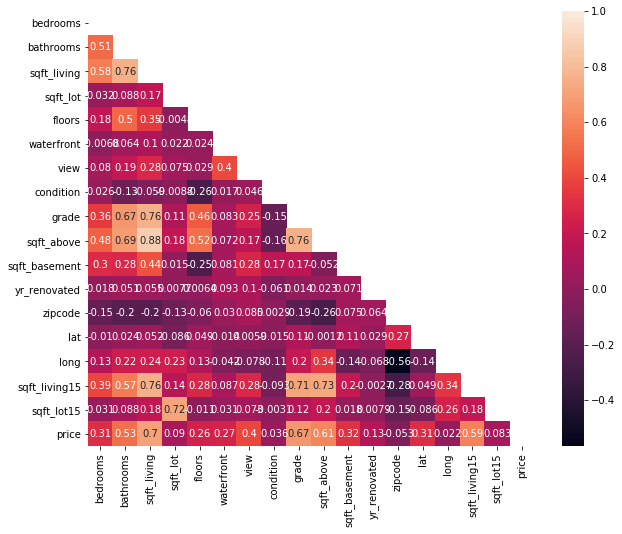

In [48]:
corr_matrix1 = realestate_reduced.corr()
mask = np.zeros_like(corr_matrix1)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix1, mask=mask, annot=True)
plt.show()

In [308]:
X = realestate_reduced.drop(['price', 'condition', 'long', 'bedrooms', 'sqft_living15', 'sqft_basement', 'sqft_lot',
                            'floors', 'sqft_lot15', 'grade', 'waterfront', 'yr_renovated', 'zipcode'], axis=1) 


In [309]:
vif2 = pd.DataFrame()
vif2['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif2['variable'] = X.columns

In [310]:
vif2

,VIF,variable
0,20.120034,bathrooms
1,35.481017,sqft_living
2,1.229743,view
3,25.371998,sqft_above
4,8.774681,lat


In [311]:
realestate_final = realestate[['price', 'sqft_living', 'grade', 'bathrooms', 'view', 'sqft_above', 'lat']]

In [270]:
# The final choice of variables for the first time running the model

realestate_final

,price,sqft_living,grade,bathrooms,view,sqft_above,lat
0,221900,1180,7,1.00,0,1180,47.5112
1,538000,2570,7,2.25,0,2170,47.7210
2,180000,770,6,1.00,0,770,47.7379
3,604000,1960,7,3.00,0,1050,47.5208
4,510000,1680,8,2.00,0,1680,47.6168
...,...,...,...,...,...,...,...
21592,360000,1530,8,2.50,0,1530,47.6993
21593,400000,2310,8,2.50,0,2310,47.5107
21594,402101,1020,7,0.75,0,1020,47.5944
21595,400000,1600,8,2.50,0,1600,47.5345


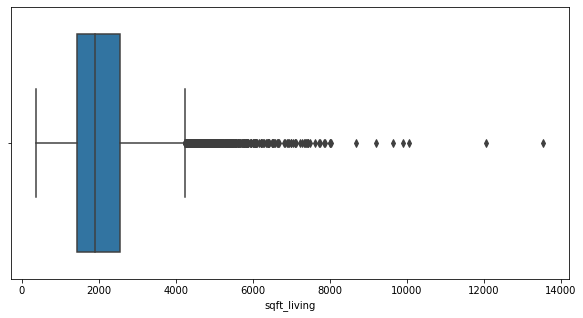

In [271]:
# Outlier Analysis

fig, axs = plt.subplots(figsize = (10,5))
plt1 = sns.boxplot(realestate['sqft_living'])

plt.show()

In [272]:
# To avoid affecting the performance of the model I remove the outliers in 
# sqft_living using the interquartile range 1.5 method

# Find the interquantile range

q1 = realestate_final['sqft_living'].quantile(.25)
q3 = realestate_final['sqft_living'].quantile(.75)
iqr = q3 - q1

In [273]:
# Create a variable for the median

median = realestate_final['sqft_living'].median()

In [274]:
# Find the upper and lower limit for removing outliers

outlier_limit_upper = median + 1.5 * iqr
outlier_limit_lower = median - 1.5 * iqr

In [275]:
# Exclude values from the column that are above or below the upper/lower limit

realestate_mod = realestate_final[realestate_final['sqft_living'] < outlier_limit_upper]

In [276]:
realestate_mod_2 = realestate_mod[realestate_mod['sqft_living'] > outlier_limit_lower]

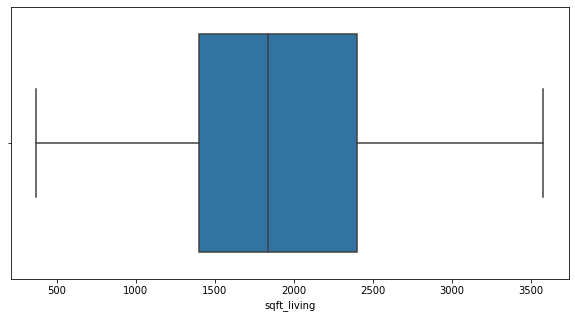

In [277]:
# Amended result

fig, axs = plt.subplots(figsize = (10,5))
plt1 = sns.boxplot(realestate_mod_2['sqft_living'])

plt.show()

In [278]:
realestate_mod_2

,price,sqft_living,grade,bathrooms,view,sqft_above,lat
0,221900,1180,7,1.00,0,1180,47.5112
1,538000,2570,7,2.25,0,2170,47.7210
2,180000,770,6,1.00,0,770,47.7379
3,604000,1960,7,3.00,0,1050,47.5208
4,510000,1680,8,2.00,0,1680,47.6168
...,...,...,...,...,...,...,...
21592,360000,1530,8,2.50,0,1530,47.6993
21593,400000,2310,8,2.50,0,2310,47.5107
21594,402101,1020,7,0.75,0,1020,47.5944
21595,400000,1600,8,2.50,0,1600,47.5345


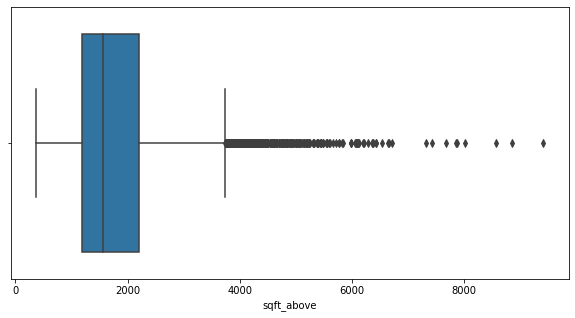

In [279]:
# Outlier Analysis

fig, axs = plt.subplots(figsize = (10,5))
plt1 = sns.boxplot(realestate['sqft_above'])

plt.show()

In [280]:
q1_1 = realestate_final['sqft_above'].quantile(.25)
q3_1 = realestate_final['sqft_above'].quantile(.75)
iqr_1 = q3_1 - q1_1
median_1 = realestate_final['sqft_above'].median()
outlier_limit_upper_1 = median_1 + 1.5 * iqr_1
outlier_limit_lower_1 = median_1 - 1.5 * iqr_1

In [281]:
realestate_mod_3 = realestate_mod_2[realestate_mod_2['sqft_above'] < outlier_limit_upper]
realestate_mod_4 = realestate_mod_3[realestate_mod_3['sqft_above'] > outlier_limit_lower]

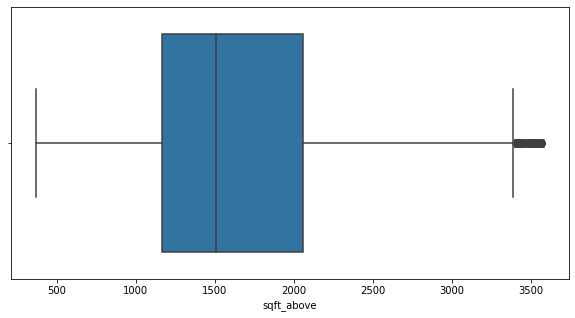

In [282]:
fig, axs = plt.subplots(figsize = (10,5))
plt1 = sns.boxplot(realestate_mod_4['sqft_above'])

plt.show()

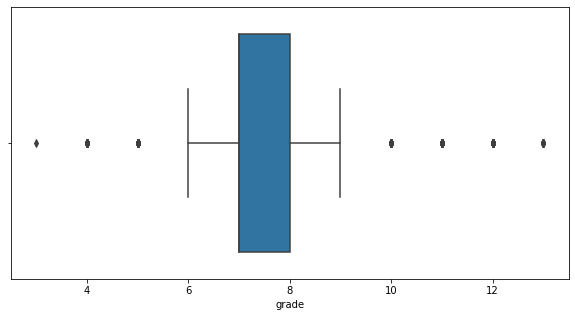

In [283]:
# Outlier Analysis

fig, axs = plt.subplots(figsize = (10,5))
plt1 = sns.boxplot(realestate['grade'])

plt.show()

In [284]:
# I decide to keep 'bathrooms', 'view' and 'grade' as they are 

In [285]:
realestate_final = realestate_mod_4

In [286]:
realestate_final

,price,sqft_living,grade,bathrooms,view,sqft_above,lat
0,221900,1180,7,1.00,0,1180,47.5112
1,538000,2570,7,2.25,0,2170,47.7210
2,180000,770,6,1.00,0,770,47.7379
3,604000,1960,7,3.00,0,1050,47.5208
4,510000,1680,8,2.00,0,1680,47.6168
...,...,...,...,...,...,...,...
21592,360000,1530,8,2.50,0,1530,47.6993
21593,400000,2310,8,2.50,0,2310,47.5107
21594,402101,1020,7,0.75,0,1020,47.5944
21595,400000,1600,8,2.50,0,1600,47.5345


In [287]:
# Reset index after rows have been removed

realestate_final = realestate_final.reset_index(drop=True)
realestate_final

,price,sqft_living,grade,bathrooms,view,sqft_above,lat
0,221900,1180,7,1.00,0,1180,47.5112
1,538000,2570,7,2.25,0,2170,47.7210
2,180000,770,6,1.00,0,770,47.7379
3,604000,1960,7,3.00,0,1050,47.5208
4,510000,1680,8,2.00,0,1680,47.6168
...,...,...,...,...,...,...,...
20220,360000,1530,8,2.50,0,1530,47.6993
20221,400000,2310,8,2.50,0,2310,47.5107
20222,402101,1020,7,0.75,0,1020,47.5944
20223,400000,1600,8,2.50,0,1600,47.5345


In [288]:
# Define X and the target variable y

X = realestate_final.drop(['price'], axis = 1)
y = realestate_final['price']

In [289]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer

# Define normalizer

# transformer = Normalizer().fit(X)

In [290]:
# X = transformer.transform(X)

In [291]:
# Define function to rescale using StandardScaler

columns = X.columns

def scale_data(data, columns, scaler):
    for col in columns:
        data[col] = scaler.fit_transform(data[col].values.reshape(-1, 1))
    return data

realestate_final_1 = scale_data(realestate_final, columns, StandardScaler())

In [292]:
X = realestate_final_1.drop(['price'], axis = 1)

In [293]:
# Final X ready for modelling

X

,sqft_living,grade,bathrooms,view,sqft_above,lat
0,-1.087933,-0.502827,-1.508851,-0.275685,-0.740371,-0.334548
1,0.940514,-0.502827,0.329028,-0.275685,0.770626,1.161055
2,-1.686252,-1.497708,-1.508851,-0.275685,-1.366138,1.281531
3,0.050332,-0.502827,1.431756,-0.275685,-0.938785,-0.266112
4,-0.358276,0.492054,-0.038548,-0.275685,0.022758,0.418244
...,...,...,...,...,...,...
20220,-0.577173,0.492054,0.696604,-0.275685,-0.206181,1.006362
20221,0.561092,0.492054,0.696604,-0.275685,0.984302,-0.338112
20222,-1.321424,-0.502827,-1.876427,-0.275685,-0.984573,0.258561
20223,-0.475021,0.492054,0.696604,-0.275685,-0.099342,-0.168449


In [294]:
# Split into test and train datasets

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42) 

In [295]:
X_train

,sqft_living,grade,bathrooms,view,sqft_above,lat
14600,1.363716,0.492054,0.696604,-0.275685,-0.206181,0.956461
1470,-0.460428,-0.502827,-1.508851,-0.275685,-0.084080,0.997095
10312,-1.190085,-0.502827,-1.508851,-0.275685,-0.847210,0.996382
293,0.006553,0.492054,0.696604,-0.275685,0.404323,-1.512211
2445,0.298416,-0.502827,-0.038548,-0.275685,0.022758,0.140937
...,...,...,...,...,...,...
11284,-1.058747,-0.502827,-1.508851,-0.275685,-0.709846,0.997808
11964,0.079519,-0.502827,0.329028,-0.275685,-0.297756,-1.363221
5390,1.845290,0.492054,1.799332,5.593506,1.442180,-0.390865
860,-0.533394,-0.502827,-0.406124,2.658910,-1.015098,0.060383


In [296]:
X_test

,sqft_living,grade,bathrooms,view,sqft_above,lat
17916,0.240043,0.492054,-0.406124,-0.275685,-0.465645,-0.562667
5217,-0.766884,-0.502827,-1.508851,-0.275685,-0.404594,-2.026904
9056,-0.912816,-0.502827,-0.773700,-0.275685,-0.557220,0.787511
5702,-0.620953,-0.502827,-0.406124,-0.275685,-1.015098,-1.898587
119,1.436681,1.486935,0.329028,-0.275685,1.900058,0.937927
...,...,...,...,...,...,...
19869,-0.898222,0.492054,0.696604,-0.275685,-0.770897,0.378323
1372,2.064187,1.486935,1.431756,2.658910,0.694313,-0.114271
884,-0.869036,0.492054,-0.406124,-0.275685,-0.511432,1.019907
20164,-1.117120,0.492054,-0.773700,-0.275685,-0.770897,0.682006


In [297]:
y_train

14600     750500
1470      440000
10312     411500
293       390000
2445      700000
          ...   
11284     289500
11964     287000
5390     1100000
860       451000
15795     620000
Name: price, Length: 16180, dtype: int64

In [298]:
y_test

17916     290000
5217      241500
9056      425000
5702      239000
119       770000
          ...   
19869     500000
1372     1330000
884       601000
20164     459000
1039      275000
Name: price, Length: 4045, dtype: int64

In [299]:
from sklearn.linear_model import LinearRegression as LinReg

# Define and fit the model

linreg = LinReg()    
linreg.fit(X_train, y_train)   
y_pred_linreg = linreg.predict(X_test)   

In [300]:
y_pred_linreg

array([494753.30667407, 203711.39375248, 430772.29721498, ...,
       532699.03774261, 486672.2572459 , 218815.88701331])

In [301]:
# Evaluate the model

print ('train R2: {} -- test R2: {}'.format(linreg.score(X_train, y_train),
                                            linreg.score(X_test, y_test)))

train R2: 0.5862131216265248 -- test R2: 0.5856466521528647


In [302]:
from sklearn.metrics import mean_squared_error as mse

train_mse=mse(linreg.predict(X_train), y_train)
test_mse=mse(linreg.predict(X_test), y_test)

print ('train MSE: {} -- test MSE: {}'.format(train_mse, test_mse))

train MSE: 25379759140.542034 -- test MSE: 28045283780.139595


In [303]:
print ('train RMSE: {} -- test RMSE: {}'.format(train_mse**.5, test_mse**.5))

train RMSE: 159310.26062542875 -- test RMSE: 167467.26181597283


In [304]:
from sklearn.metrics import mean_absolute_error as mae

train_mae=mae(linreg.predict(X_train), y_train)
test_mae=mae(linreg.predict(X_test), y_test)

print ('train MAE: {} -- test MAE: {}'.format(train_mse, test_mse))

train MAE: 25379759140.542034 -- test MAE: 28045283780.139595


In [305]:
# KNN

# Define the model

from sklearn.neighbors import KNeighborsRegressor

knn_model = KNeighborsRegressor(n_neighbors = 4) # We use a K of 4
knn_model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=4)

In [306]:
# Get our prediction

knn_predictions = knn_model.predict(X_test)


In [307]:
# Our error metrics to evaluate the model

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

MAE = mean_absolute_error(y_test,knn_predictions)
MSE = mean_squared_error(y_test,knn_predictions)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_test,knn_predictions)

print("The mean absolute error of the model in the test set is: %6.2f" % (MAE))
print("The mean squared error of the model in the test set is: %6.2f" % (MSE))
print("The root mean squared error of the model in the test set is: %6.2f" % (RMSE))
print("The R2 of the model in the test set is: %4.2f" % (R2))

The mean absolute error of the model in the test set is: 89036.10
The mean squared error of the model in the test set is: 19990081950.56
The root mean squared error of the model in the test set is: 141386.29
The R2 of the model in the test set is: 0.70


# How to interpret the results


# MAE 
A small MAE suggests the model is great at prediction, while a large MAE suggests that your model may have trouble in certain areas. A MAE of 0 means that your model is a perfect predictor of the outputs (but this will almost never happen).

# MSE & RMSE

MSE and RMSE both square the residual, they are similarly affected by outliers. The RMSE is analogous to the standard deviation (MSE to variance) and is a measure of how large your residuals are spread out. Both MAE and MSE can range from 0 to positive infinity, so as both of these measures get higher, it becomes harder to interpret how well your model is performing.

# R2
R2 is the percentage of the response variable variation that is explained by a linear model. R-squared is always between 0 and 100%:

0% indicates that the model explains none of the variability of the response data around its mean.
100% indicates that the model explains all the variability of the response data around its mean.